# Full revision analysis

## List of work to be performed:
1. Supplementary figure showing incorrect inform tumor segmentation and NKT cells 
2. Supplementary figure with zoom-in images of individual cells from inForm and TME-Analyzer in an image with high disagreement 
3. Incorporation of DeepCell into TME-Analyzer 
4. Reorganize the MonteCarlo trials 
5. Supplementary table 6 with full ranking of parameters and discovery/validation p values if top n parameters were used instead. 
6. Generate forest plot for 4E 
7. Build classifier based on train-test split of discovery cohort. Try 16-47, 32-31, 47-16 splits. 
8. ? It is significant amount of work, but since both reviewers mention is, I can train a random forest on the original dataset and report it ? 

## 1. Supplementarty figure showing incorrect inform tumor segmentation and NKT cells
Stepwise approach;
1.1. load segmentation excel file and look for images where this went wrong in inForm
note: for these images the main problem is that they were not analyzed! I do not know why not. For those that were analyzed, I generated a confusion segmentation for those that are in the highest disagreement

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil

TME_analyzer_folder = "E:/Desktop_backup_20231031/Desktop/TME-Analyzer_the_manuscript/stardist_analysis_20201108/analysis_results/"
inForm_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/inForm_output_images/"
output_folder1 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/confusion_images/"
output_folder2 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/non_analyzed_images/"
px_size = 0.4999

combined_frame5 = pd.read_csv("E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data_analysis/reproduction_of_old_analysis/20230607_Marcel/combined_full.xls",sep='/t').set_index('sample id')
key_of_interest = "area of Stroma found by inForm analysis"
mod_mult = (px_size**2) / 1000000
x1 = combined_frame5[key_of_interest] * mod_mult
y1 = combined_frame5[key_of_interest.replace('inForm','auto')] * mod_mult
x1 = x1.fillna(0)
y1 = y1.fillna(0)
key_of_interest2 = key_of_interest.replace('Stroma','Tumor')
x2 = combined_frame5[key_of_interest2] * mod_mult
y2 = combined_frame5[key_of_interest2.replace('inForm','auto')] * mod_mult
x2 = x2.fillna(0)
y2 = y2.fillna(0)
images_of_interest = []
ratio_max = 1
for n_i, i in enumerate(combined_frame5.index):
    if (y2[n_i] > ratio_max*x2[n_i]) & (x2[n_i]>0):
        ratio_max = y2[n_i]/x2[n_i]
        max_id = [n_i, i]
images_of_interest.append(max_id)
ratio_max = 1
for n_i, i in enumerate(combined_frame5.index):
    if (y2[n_i] > ratio_max*x2[n_i]) & (x2[n_i]>0) & (n_i != 1004):
        ratio_max = y2[n_i]/x2[n_i]
        max_id = [n_i, i]
images_of_interest.append(max_id)
ratio_max = 1
for n_i, i in enumerate(combined_frame5.index):
    if (y2[n_i] > ratio_max*x2[n_i]) & (x2[n_i]>0) & (n_i != 1004)& (n_i != 499):
        ratio_max = y2[n_i]/x2[n_i]
        max_id = [n_i, i]
images_of_interest.append(max_id)
ratio_max = 1
for n_i, i in enumerate(combined_frame5.index):
    if (y1[n_i] > ratio_max*x1[n_i]) & (x1[n_i]>0) & (n_i != 480):
        ratio_max = y1[n_i]/x1[n_i]
        max_id = [n_i, i]
images_of_interest.append(max_id)
ratio_max = 1
for n_i, i in enumerate(combined_frame5.index):
    if (x2[n_i] > ratio_max*y2[n_i]) & (y2[n_i]>0):
        ratio_max = x2[n_i]/y2[n_i]
        max_id = [n_i, i]
        # print(i,y2[n_i],x2[n_i],y1[n_i],x1[n_i])
images_of_interest.append(max_id)
ratio_max = 1
for n_i, i in enumerate(combined_frame5.index):
    if (x1[n_i] > ratio_max*y1[n_i]) & (y1[n_i]>0):
        ratio_max = x1[n_i]/y1[n_i]
        max_id = [n_i, i]
        # print(i,y2[n_i],x2[n_i],y1[n_i],x1[n_i])
images_of_interest.append(max_id)

TME_files_of_interest = [i for i in os.listdir(TME_analyzer_folder) for j in images_of_interest if (j[1] in i) & ('_Tumor+_auto' in i)]
inForm_files_of_interest = [i for i in os.listdir(inForm_folder) for j in images_of_interest if (j[1][:j[1].find('_')] in i) & (j[1][j[1].find('_')+1:] in i) & ('_image_with_tissue_seg' in i)]

for i in TME_files_of_interest:
    shutil.copy(TME_analyzer_folder + i,output_folder1 + i)
    i = i.replace('_Tumor+_auto','')
    shutil.copy(TME_analyzer_folder + i,output_folder1 + i)
for i in inForm_files_of_interest:
    shutil.copy(inForm_folder + i,output_folder1 + i)
    i = i.replace('_image_with_tissue_seg','_composite_image')
    shutil.copy(inForm_folder + i,output_folder1 + i)
    i = i.replace('_composite_image','_Opal 690_path_view')
    try:
        shutil.copy(inForm_folder + i,output_folder1 + i)
    except:
        i=i.replace('Opal 690','CK')
        shutil.copy(inForm_folder + i,output_folder1 + i)
selected_data = combined_frame5.loc[[i[1] for i in images_of_interest],[key_of_interest,key_of_interest.replace('inForm','auto'),key_of_interest2,key_of_interest2.replace('inForm','auto')]]*mod_mult
selected_data.to_excel(output_folder1+'regions_areas.xls')

images_of_interest2 = []
for n_i, i in enumerate(combined_frame5.index):
    if (x2[n_i] == 0) & (y2[n_i] > 0):
        images_of_interest2.append([n_i, i])
TME_files_of_interest2 = [i for i in os.listdir(TME_analyzer_folder) for j in images_of_interest2 if (j[1] in i) & ('_Tumor+_auto' in i)]
for i in TME_files_of_interest2:
    shutil.copy(TME_analyzer_folder + i,output_folder2 + i)
    i = i.replace('_Tumor+_auto','')
    shutil.copy(TME_analyzer_folder + i,output_folder2 + i)


make a list of files with missing analysis

In [62]:
import pandas as pd
import numpy as np
import os
import shutil

TME_analyzer_folder = "E:/Desktop_backup_20231031/Desktop/TME-Analyzer_the_manuscript/stardist_analysis_20201108/analysis_results/"
inForm_folder2 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/additional_composite_images/"
output_folder1 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/confusion_images/"
output_folder2 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/non_analyzed_images/"
px_size = 0.4999

combined_frame5 = pd.read_csv("E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data_analysis/reproduction_of_old_analysis/20230607_Marcel/combined_full.xls",sep='\t').set_index('sample id')
key_of_interest = "area of Stroma found by inForm analysis"
mod_mult = (px_size**2) / 1000000
x1 = combined_frame5[key_of_interest] * mod_mult
y1 = combined_frame5[key_of_interest.replace('inForm','auto')] * mod_mult
# x1 = x1.fillna(0)
# y1 = y1.fillna(0)

missing_files_stroma = [n_i for n_i, i in enumerate(x1.to_numpy()) if np.isnan(i)]
missing_files_stroma_Auto = [n_i for n_i, i in enumerate(y1.to_numpy()) if np.isnan(i)]
if len(missing_files_stroma_Auto) > 0:
    print(y1.index[missing_files_stroma_Auto],missing_files_stroma_Auto)
key_of_interest2 = key_of_interest.replace('Stroma','Tumor')
x2 = combined_frame5[key_of_interest2] * mod_mult
y2 = combined_frame5[key_of_interest2.replace('inForm','auto')] * mod_mult
missing_files_tumor = [n_i for n_i, i in enumerate(x2.to_numpy()) if np.isnan(i)]
missing_files_tumor_Auto = [n_i for n_i, i in enumerate(y2.to_numpy()) if np.isnan(i)]
if len(missing_files_tumor_Auto) > 0:
    print(y1.index[missing_files_tumor_Auto],missing_files_tumor_Auto)

missing_files = []
missing_files_ids = []
for i in missing_files_stroma:
    if i in missing_files_tumor:
        missing_files.append(x1.index[i])
        missing_files_ids.append(i)
    else:
        print(x1.index[i],'missing for stroma')
for i in missing_files_tumor:
    if i not in missing_files_stroma:
        print(x1.index[i],'missing for tumor')
for n_i, i in enumerate(np.unique(missing_files)):             
    print(n_i+1, i)

inForm_files_of_interest = [i for i in os.listdir(inForm_folder2) for j in missing_files if (j[:j.find('_')] in i) & (j[j.find('_')+1:] in i) & ('_composite_image' in i)]

for i in inForm_files_of_interest:
    shutil.copy(inForm_folder2 + i,output_folder2 + i)


Index(['FG-87-10839 excl_[48581,14771]', 'FG-87-10839 excl_[48581,14771]',
       'IC-90-08870 infl_[41660,10828]', 'IC-90-08870 infl_[41660,10828]'],
      dtype='object', name='sample id') [622, 623, 856, 857]
Index(['FG-87-10839 excl_[48581,14771]', 'FG-87-10839 excl_[48581,14771]',
       'IC-90-08870 infl_[41660,10828]', 'IC-90-08870 infl_[41660,10828]'],
      dtype='object', name='sample id') [622, 623, 856, 857]
1 DH-85-00421_[42036,13273]
2 DH-88-01020_[59608,9470]
3 DH-88-01020_[61775,12537]
4 DH-93-07884_[45527,5553]
5 DH-95-02076_[37432,17399]
6 DH-95-02076_[38331,19815]
7 DH-95-02076_[39576,16328]
8 DH-95-02076_[39730,20521]
9 DH-95-02076_[39862,17724]
10 DH-95-02076_[39944,18998]
11 DH-96-02660_[59618,7153]
12 DH-98-01114_[36039,7069]
13 DH-98-01114_[40676,7018]
14 DH-98-01114_[42543,16440]
15 DH-98-01114_[46695,11272]
16 FG-87-10839 excl_[48581,14771]
17 FG-88-13129_[40673,16285]
18 FG-88-13129_[43802,7823]
19 FG-88-13129_[44160,15540]
20 FG-88-13129_[45708,12373]
21 FG-

copy all images to just go through, since they are impossible to select, let's rank them from the most to least similar

In [101]:
all_files = [i for n_i, i in enumerate(combined_frame5.index) if (n_i not in missing_files_ids) & (n_i not in missing_files_tumor_Auto)]
TME_files_of_interest = [i for i in os.listdir(TME_analyzer_folder) for j in all_files if (j in i) & ('_Tumor+_auto' in i)]
inForm_files_of_interest = [i for i in os.listdir(inForm_folder) for j in all_files if (j[:j.find('_')] in i) & (j[j.find('_')+1:] in i) & ('_image_with_tissue_seg' in i)]

n_dist = np.abs(y1-x1) + np.abs(y2-x2)
# print(n_dist.isna())
n_dist = n_dist.dropna()

# arg_dist = np.argsort(n_dist)
# print(n_dist.iloc[arg_dist])
output_folder3 = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/all_segmentation_images/"
# print(TME_files_of_interest)
# print(inForm_files_of_interest)
# print(combined_frame5.index)
# print(arg_dist)
for n_i, arg_index in enumerate(n_dist.iloc[np.argsort(n_dist)].index):
    i = [i for i in TME_files_of_interest if arg_index in i][0]
    # n_i = arg_dist.loc[i[:i.find(']_')+1]]
    shutil.copy(TME_analyzer_folder + i,output_folder3 + f"{n_i:04d}_" + i)
    i = i.replace('_Tumor+_auto','')
    shutil.copy(TME_analyzer_folder + i,output_folder3 + f"{n_i:04d}_" + i)
    
    i = [i for i in inForm_files_of_interest if arg_index in i][0]
# for i in inForm_files_of_interest:
    # n_i = arg_dist.loc[i[:i.find(']_')+1]]
    shutil.copy(inForm_folder + i,output_folder3 + f"{n_i:04d}_" + i)
    i = i.replace('_image_with_tissue_seg','_composite_image')
    shutil.copy(inForm_folder + i,output_folder3 + f"{n_i:04d}_" + i)
    i = i.replace('_composite_image','_Opal 690_path_view')
    try:
        shutil.copy(inForm_folder + i,output_folder3 + f"{n_i:04d}_" + i)
    except:
        i=i.replace('Opal 690','CK')
        shutil.copy(inForm_folder + i,output_folder3 + f"{n_i:04d}_" + i)


## 1. Supplementarty figure showing incorrect inform tumor segmentation and NKT cells
Stepwise approach;
1.2. Find an image with the maximum NKT presence, and present it.
start by quantifying NKTs

In [2]:
import os
import pandas as pd
import numpy as np
px_size = 0.4999

automated_folder = 'E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/data tables/'
inform_folder = 'E:/Moved from E/Dora effector/data_tables_inform/'
output_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/"

phenos = ['CD20','CD3','CD3 CD8','CD56','CD68','CK','other','All']

tissues = ['All', 'Stroma', 'Tumor']

os.chdir(automated_folder)
auto_xls = os.listdir()
auto_xls = [i for i in auto_xls if i[-4:] == '.xls']
MSI_names_temp = [i[:i.find(']')+1] for i in auto_xls]
MSI_names = []
MSI_names_excluded = []
for MSI in MSI_names_temp:
    try:
        inform_data = pd.read_csv(inform_folder + MSI + '_cell_seg_data_summary.txt', sep='\t')
        MSI_names.append(MSI)
    except:
        MSI_names_excluded.append(MSI)

phenos = ['NKT']

tissues = ['All', 'Stroma', 'Tumor']
analysis_methods = ['auto']
panda_cols = []
panda_cols.append('location')
for pheno in phenos:
    for tissue in tissues:
        for method in analysis_methods:
            panda_cols.append('number of ' + pheno + ' in ' + tissue + ' found by ' + method + ' analysis')
            panda_cols.append('density of ' + pheno + ' in ' + tissue + ' found by ' + method + ' analysis')

data_frame = pd.DataFrame(index = MSI_names_temp, columns = panda_cols)

for n_f, MSI in enumerate(MSI_names_temp):
    auto_data = pd.read_excel(MSI + '_component_data.xls')
    if 'border' in inform_data['Path'][0]:
        data_frame.loc[MSI]['location'] = 'border'
    elif 'center' in inform_data['Path'][0]:
        data_frame.loc[MSI]['location'] = 'center'
    for tissue in tissues:
        if tissue == 'All':
            auto_of_interest = [i for i,j in enumerate(auto_data['Segments'].to_numpy()) if tissue in j]
        else:
            auto_of_interest = [i for i,j in enumerate(auto_data['Segments'].to_numpy()) if tissue + '+'  in j]
        auto_of_interest = auto_data.iloc[auto_of_interest,:]
        tissue_area_auto = np.sum(auto_of_interest['Cell Area'])
        for pheno in phenos:
            if tissue_area_auto > 0 :
                pheno_of_interest = auto_of_interest['Phenotypes'].to_numpy()
                if pheno == 'NKT':
                    pheno_of_interest = [i for i,j in enumerate(pheno_of_interest) if (('CD3+' in j) & ('CD56+' in j))]
                data_frame.loc[MSI]['density of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = len(pheno_of_interest)/tissue_area_auto*1000000
                data_frame.loc[MSI]['number of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = len(pheno_of_interest)
            else:
                data_frame.loc[MSI]['density of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = 0
                data_frame.loc[MSI]['number of ' + pheno + ' in ' + tissue + ' found by auto analysis'] = 0

data_frame.to_excel(output_folder + 'NKT_quantification2.xls')

Collect the workplaces that have more than 10 NKTs
These workplaces have been reanalyzed with TME-Analyzer for NKT quantification/visualization so do not run this code again

In [24]:
import shutil
output_folder = "E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/NKT_workplaces/"
pickle_folder = 'E:/Moved from E/TME-Analyzer_the_manuscript/20211129_TME-Analyzer/workplaces/'
images_of_interest = []
for i in data_frame.index:
    try:
        if data_frame.loc[i,'number of NKT in All found by auto analysis']>10:
            images_of_interest.append(i)
    except:
        pass
# [i for i in data_frame.index if data_frame.loc[i,'number of NKT in All found by auto analysis']>10]
for i in images_of_interest:
    shutil.copy(pickle_folder+i+'_component_data.pickle',output_folder+i+'_component_data.pickle')

The representative image selected is DH-93-07884_[54144,5272]_component_data.pickle; so lets load it

In [25]:
import pickle
# import matplotlib.gridspec as gridspec
pickle_folder = 'E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/NKT_workplaces/modified/'
pickle_folder = 'E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/NKT_workplaces/'
selected_file = 'DH-93-07884_[54144,5272]_component_data.pickle'
pickle_data = pickle.load(open(pickle_folder + selected_file, "rb"))
# skimage.io.imread(filename)

crop region selected upon visual inspection is x1, x2, y1, y2 = 900,1200,500,700; so get info related to this patch

In [29]:
Cell_props = pickle_data['Cell_props']
x1, x2, y1, y2 = 900,1200,500,700
nkt_cells = [i for i in Cell_props.index if ('CD3+' in Cell_props.loc[i,'Phenotypes']) & ('CD56+' in Cell_props.loc[i,'Phenotypes'])]
CD4_cells = [i for i in Cell_props.index if ('CD3+' in Cell_props.loc[i,'Phenotypes']) & ('CD8+' not in Cell_props.loc[i,'Phenotypes']) & ('CD56+' not in Cell_props.loc[i,'Phenotypes'])]
CD8_cells = [i for i in Cell_props.index if ('CD3+' in Cell_props.loc[i,'Phenotypes']) & ('CD8+' in Cell_props.loc[i,'Phenotypes']) & ('CD56+' not in Cell_props.loc[i,'Phenotypes'])]
CD56_cells = [i for i in Cell_props.index if ('CD3+' not in Cell_props.loc[i,'Phenotypes']) & ('CD56+' in Cell_props.loc[i,'Phenotypes'])]
nkt_locs = Cell_props.loc[nkt_cells,'Cell Centroid'].to_numpy()
nkt_locs_crop = []
for i in nkt_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        nkt_locs_crop.append([i[0]-y1,i[1]-x1])

CD4_locs = Cell_props.loc[CD4_cells,'Cell Centroid'].to_numpy()
CD4_locs_crop = []
for i in CD4_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD4_locs_crop.append([i[0]-y1,i[1]-x1])

CD8_locs = Cell_props.loc[CD8_cells,'Cell Centroid'].to_numpy()
CD8_locs_crop = []
for i in CD8_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_locs_crop.append([i[0]-y1,i[1]-x1])

CD56_locs = Cell_props.loc[CD56_cells,'Cell Centroid'].to_numpy()
CD56_locs_crop = []
for i in CD56_locs:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD56_locs_crop.append([i[0]-y1,i[1]-x1])


make single channel phenotype plots

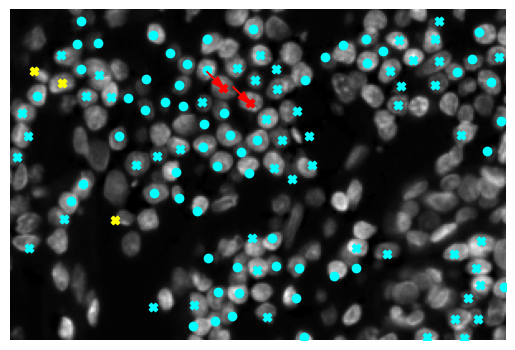

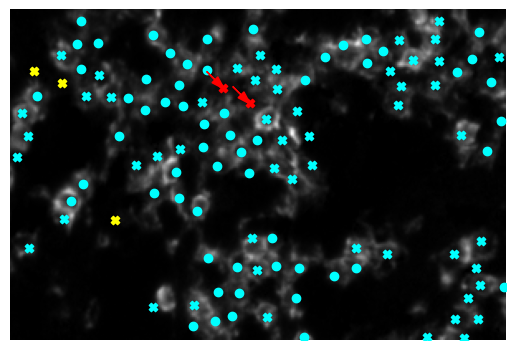

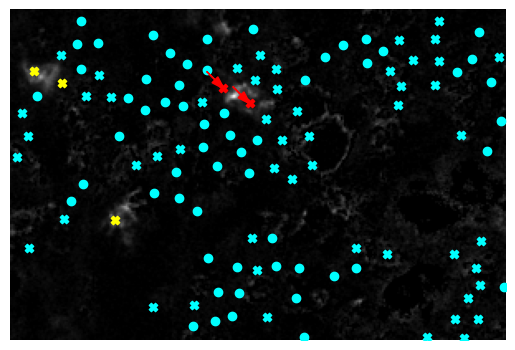

In [30]:
from matplotlib import pyplot as plt
for i in [0,3,5]:
    plt.figure()
    plt.imshow(pickle_data['im_raw'][y1:y2,x1:x2,i])
    plt.axis('off')
    plt.set_cmap('gray')
    for i in CD8_locs_crop:
        # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
        plt.scatter(i[1],i[0],marker='o',color='cyan')
    for i in CD4_locs_crop:
        # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
        plt.scatter(i[1],i[0],marker='X',color='cyan')
    for i in CD56_locs_crop:
        # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
        plt.scatter(i[1],i[0],marker='X',color='yellow')
    for i in nkt_locs_crop:
        plt.scatter(i[1],i[0],marker='X',color='red')
        plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)

composite scatter with CD56, CD3, DAPI as RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


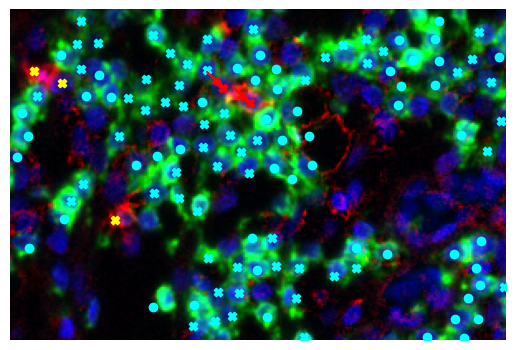

In [31]:
plt.figure()
to_plot = pickle_data['im_raw'][y1:y2,x1:x2,[5,3,0]]/4
to_plot[:,:,2] /= 10
to_plot[:,:,1] /= 2
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='X',color='cyan')
for i in CD4_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='o',color='cyan')
for i in CD56_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='X',color='yellow')
for i in nkt_locs_crop:
    plt.scatter(i[1],i[0],marker='X',color='red')
    plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)

now using the whole composite image with 7 channels

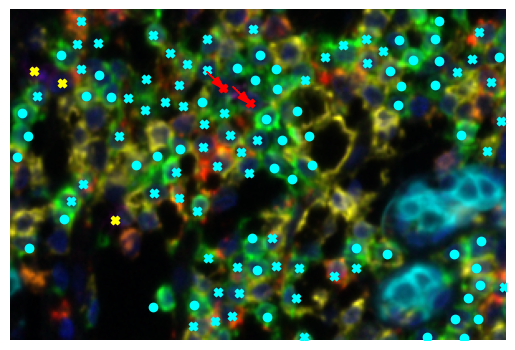

In [33]:
import skimage.io
to_plot = skimage.io.imread("E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/inForm_output_images/" + 
                            selected_file.replace("_component_data.pickle","_composite_image.tif"))
to_plot = to_plot[y1:y2,x1:x2,:]
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='X',color='cyan')
for i in CD4_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='o',color='cyan')
for i in CD56_locs_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='X',color='yellow')
for i in nkt_locs_crop:
    plt.scatter(i[1],i[0],marker='X',color='red')
    plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)

now to compare it with the inform output

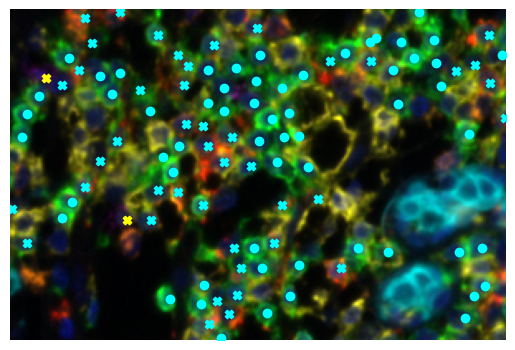

In [35]:
import pandas as pd
inform_analysis = pd.read_csv("E:/Moved from E/grants/202004_TUDelft_master/shared with Daniel/TNBC cohort/inform analysis/" + 
                              selected_file.replace("_component_data.pickle","_cell_seg_data.txt"),sep='\t')
CD3_locs_crop_inform = []
CD56_locs_crop_inform = []
inform_analysis.keys()
CD8_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD3 CD8']
CD4_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD3']
CD56_cells_inForm = [i for i in inform_analysis.index if inform_analysis.loc[i,'Phenotype'] == 'CD56']

                    
CD4_locs_inform = inform_analysis.loc[CD4_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD4_locs_inform_crop = []
for i in CD4_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD4_locs_inform_crop.append([i[0]-y1,i[1]-x1])
  
CD8_locs_inform = inform_analysis.loc[CD8_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD8_locs_inform_crop = []
for i in CD8_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD8_locs_inform_crop.append([i[0]-y1,i[1]-x1])
  
CD56_locs_inform = inform_analysis.loc[CD56_cells_inForm,['Cell Y Position','Cell X Position']].to_numpy()
CD56_locs_inform_crop = []
for i in CD56_locs_inform:
    if (i[0] > y1) & (i[0] < y2) & (i[1] > x1) & (i[1] < x2):
        CD56_locs_inform_crop.append([i[0]-y1,i[1]-x1])

to_plot = skimage.io.imread("E:/TME-Analyzer-large-files-from-desktop-folder/20231207_revision_files/Task1/inForm_output_images/" + 
                            selected_file.replace("_component_data.pickle","_composite_image.tif"))
to_plot = to_plot[y1:y2,x1:x2,:]
plt.imshow(to_plot)
plt.axis('off')
plt.set_cmap('gray')
for i in CD8_locs_inform_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='X',color='cyan')
for i in CD4_locs_inform_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='cyan',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='o',color='cyan')
for i in CD56_locs_inform_crop:
    # plt.arrow(i[1]-6,i[0]-6,2,2,color='yellow',head_width=2,head_length=4,head_starts_at_zero=True)
    plt.scatter(i[1],i[0],marker='X',color='yellow')
# for i in nkt_locs_crop:
#     plt.scatter(i[1],i[0],marker='X',color='red')
#     plt.arrow(i[1]-13,i[0]-13,5,5,color='red',head_width=5,head_length=8,head_starts_at_zero=True)